In [1]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

In [4]:
mnist = fetch_openml('mnist_784')

In [5]:
X,y = mnist['data'],mnist['target']

In [6]:
from collections import Counter
Counter(y)

Counter({'5': 6313,
         '0': 6903,
         '4': 6824,
         '1': 7877,
         '9': 6958,
         '2': 6990,
         '3': 7141,
         '6': 6876,
         '7': 7293,
         '8': 6825})

In [7]:
X_train = np.array(X[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
X_test = np.array(X[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)

# 用PCA对数据进行降维
pca = PCA(1)  #也可以指定识别率，自动确定降维后的维数
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)


# 将降维后的数据用kNN进行分析
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)
score = knn_clf.score(X_test_reduction,y_test)
print(score)

0.2754


In [8]:
score = []
r = list(range(10, 201, 10))
score

[]

In [11]:
for i in r:
    pca = PCA(i)  #也可以指定识别率，自动确定降维后的维数
    pca.fit(X_train)
    X_train_reduction = pca.transform(X_train)
    X_test_reduction = pca.transform(X_test)


    # 将降维后的数据用kNN进行分析
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train_reduction,y_train)
    score += [knn_clf.score(X_test_reduction,y_test)]

In [17]:
score = score[20:]

In [18]:
score

[0.9276,
 0.9692,
 0.9754,
 0.9747,
 0.9749,
 0.975,
 0.9745,
 0.9742,
 0.9725,
 0.9728,
 0.9728,
 0.9722,
 0.972,
 0.9714,
 0.9717,
 0.9712,
 0.9706,
 0.9699,
 0.9707,
 0.9696]

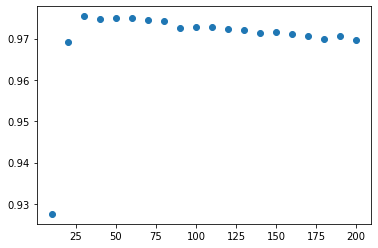

In [20]:
import matplotlib.pyplot as plt
plt.scatter(r, score)

In [ ]:
plt.show